Goal: We are an electricity supplier, and it is currently 11 a.m. on 03/21/2023[hypthetical day]. We would like to participate in the day-ahead market auction at 12 p.m. to purchase 1 MW of electricity for each hour of the day on 03/22/2023[tomorrow]. We will, therefore, place a bid for 1 MW at a certain price for the entire 24 hours of 03/22/2023. We would like to place bids based on our forecasts of the 24 auction prices today, using our model.
Our model takes into account the intraday market exchanges for deliveries from 00:00-01:00... 23:00-midnight for the day of 03/21/2023[hypthetical day]. There have been intraday exchanges for the day of 03/21/2023[hypthetical day] since the end of the auction on 03/20/2023[yesterday]. We can integrate the latest transactions for the delivery of each hour today, made on the intraday market, into our model.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from data_import import import_clean_energy_data

In [20]:

# df = pd.read_csv('raw_data/energy_dataset.csv')
# df1 = pd.read_csv('raw_data/weather_features.csv')
# def import_clean_data(df,dropNA=True):
 

#     df['time'] = pd.to_datetime(df['time'], utc=True)
#     df['time'] = df['time'].dt.tz_convert('Europe/Madrid')
#     df = df.set_index('time')
#     df = df.drop(columns=['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead', 'generation marine', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation fossil coal-derived gas', 'generation wind offshore'])
#     df.columns = df.columns.str.replace(' ', '_')

#     if dropNA == True:
#         df = df.dropna()

#     return df
# df = import_clean_data(data_energy)

df = import_clean_energy_data()

Importing energy_dataset data from /home/hassan/code/marvinliebisch/forecasting-electricity-prices/raw_data/energy_dataset.csv...


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35018 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation_biomass                           35018 non-null  float64
 1   generation_fossil_brown_coal/lignite         35018 non-null  float64
 2   generation_fossil_gas                        35018 non-null  float64
 3   generation_fossil_hard_coal                  35018 non-null  float64
 4   generation_fossil_oil                        35018 non-null  float64
 5   generation_hydro_pumped_storage_consumption  35018 non-null  float64
 6   generation_hydro_run-of-river_and_poundage   35018 non-null  float64
 7   generation_hydro_water_reservoir             35018 non-null  float64
 8   generation_nuclear                           35018 non-null  float64
 9   generation_other         

In [22]:
df.head()

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual
time,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


In [6]:
df.tail()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89
35063,2018-12-31 23:00:00+01:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88


In [7]:
print(df.duplicated().sum())

0


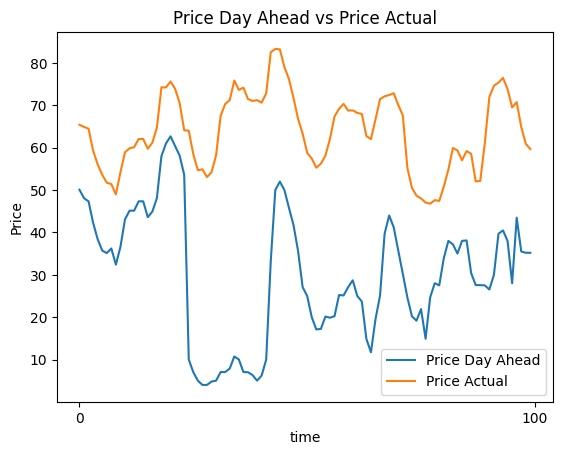

In [12]:
df500 = df[:100]

# Create a line plot of the two columns
plt.plot(df500['price day ahead'], label='Price Day Ahead')
plt.plot(df500['price actual'], label='Price Actual')


ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(100))

# Add labels and legend to the plot
plt.xlabel('time')
plt.ylabel('Price')
plt.title('Price Day Ahead vs Price Actual')
plt.legend()

# Display the plot
plt.show()







In [9]:
df1.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


# Prepare our data for modeling
This involves splitting the data back out into plain NumPy arrays.

# Modeling - What is our baseline?

what is the simplest model we can think of.?
Our model should beat at least beast some ## of accuracy

### 1 To generate a baseline model with your dataset, you can follow these general steps
Explore and preprocess the data: First, you need to explore your dataset to get an understanding of the data and 
    its distribution. You can do this by visualizing the data using graphs, checking for missing values, and handling 
    any outliers. Then, you can preprocess the data by encoding categorical variables, scaling numerical variables, 
    and splitting the data into training and test sets.

Encoding categorical variables means transforming categorical data, such as text or nominal values, into numerical values that can be used in machine learning models. Machine learning algorithms work with numerical data, and they cannot directly process categorical data. Therefore, categorical variables must be transformed into a numerical representation.

There are two main ways to encode categorical variables: ordinal encoding and one-hot encoding.

Ordinal Encoding: Ordinal encoding assigns a unique numerical value to each category in the variable. The categories are ordered based on their relative position or rank, and the numerical values are assigned accordingly. For example, suppose we have a categorical variable "Education Level" with three categories: "High School", "Bachelor's Degree", and "Master's Degree". We can assign numerical values 1, 2, and 3 respectively, where 1 represents the lowest education level and 3 represents the highest.

One-Hot Encoding: One-hot encoding creates a binary column for each category in the variable. Each column represents a single category, and the value in each column is 1 if the observation belongs to that category and 0 otherwise. For example, using the "Education Level" variable with three categories, we would create three columns: "High School", "Bachelor's Degree", and "Master's Degree". If an observation has a "High School" education level, the "High School" column would have a value of 1, and the "Bachelor's Degree" and "Master's Degree" columns would have a value of 0.

Both ordinal and one-hot encoding have their pros and cons, and the choice of encoding method depends on the specific dataset and problem you are trying to solve.

### 2 Select a model: 
You can start by selecting a simple model, such as a linear regression or decision tree, to create a     baseline model.


### 3 Train the model: 
You can then train the selected model on the training dataset.

### 4 Evaluate the model: 
After training the model, you need to evaluate it on the test dataset to assess its performance. 
    You can use various evaluation metrics, such as mean squared error (MSE), mean absolute error (MAE), and R-squared.

 ### 5 Iterate and improve: 
 If the model performance is not satisfactory, you can try improving the model by experimenting 
    with different algorithms or hyperparameters, adding or removing features, or adjusting the preprocessing steps.

### Finalize the baseline model:
Once you are satisfied with the performance of the baseline model, you can finalize it and 
    use it as a starting point for further analysis.

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df[['generation_fossil_brown_coal/lignite', 'generation_fossil_gas', 'generation_fossil_hard_coal', 'generation_hydro_pumped_storage_consumption']],
    df['price_day_ahead'],
    test_size=0.2,
    random_state=42
)

In [25]:
# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [29]:
# Evaluate the model's performance using MSE, MAE, and R-squared metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [30]:
print(f"Mean squared error (MSE): {mse:.2f}")
print(f"Mean absolute error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean squared error (MSE): 76.86
Mean absolute error (MAE): 6.98
R-squared (R2): 0.63
